# G01

# Cristina Molina

# Jaime del Rey

## Índice

- [Bolsas de palabras y clasificadores](#Bolsas-de-palabras-y-clasificadores)
- [Resultados de los clasificadores](#Resultados-de-los-clasificadores)
- [Variables discriminatorias](#Variables-discriminatorias)
- [Parte B](#PARTE-B)
- [Mejor Arbol](#Mejor-árbol)
- [Mejor Naive Bayes](#Mejor-Naive-Bayes)
- [Representacion del arbol](#Representación-del-árbol)

In [2]:
##Imports
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [3]:
with open('yelp_labelled.txt') as f:
    data = f.read().splitlines()

In [4]:
target = []
for i in data:
    target.append(int(i[-1]))
    
target = np.array(target)

In [5]:
#Hacemos la partición de train y test y para cada uno obtenemos su target. Declaramos los target names
train_data, test_data = train_test_split(data,test_size=0.25, shuffle=True, random_state=42)

train_target = []
for i in train_data:
    train_target.append(int(i[-1]))
    
test_target = []
for i in test_data:
    test_target.append(int(i[-1]))
    
target_names = {0:'negativo', 1:'positivo'}

print("Training texts:", len(train_data))
print("Test texts:", len(test_data))

Training texts: 750
Test texts: 250


In [6]:
target_names

{0: 'negativo', 1: 'positivo'}

In [8]:
train_data

['The turkey and roast beef were bland.\t0',
 'Spend your money and time some place else.\t0',
 'Great atmosphere, friendly and fast service.\t1',
 'If you stay in Vegas you must get breakfast here at least once.\t1',
 'Service is perfect and the family atmosphere is nice to see.\t1',
 'A couple of months later, I returned and had an amazing meal.\t1',
 "Point your finger at any item on the menu, order it and you won't be disappointed.\t1",
 'There is really nothing for me at postinos, hope your experience is better\t0',
 'Every time I eat here, I see caring teamwork to a professional degree.\t1',
 'Now I am getting angry and I want my damn pho.\t0',
 "Ryan's Bar is definitely one Edinburgh establishment I won't be revisiting.\t0",
 'The food was outstanding and the prices were very reasonable.\t1',
 'Food arrived quickly!\t1',
 'The service was not up to par, either.\t0',
 'As always the evening was wonderful and the food delicious!\t1',
 'The service was great, even the manager came 

In [10]:
test_data

["If you haven't gone here GO NOW!\t1",
 'Try them in the airport to experience some tasty food and speedy, friendly service.\t1',
 'The restaurant is very clean and has a family restaurant feel to it.\t1',
 "I personally love the hummus, pita, baklava, falafels and Baba Ganoush (it's amazing what they do with eggplant!).\t1",
 'Come hungry, leave happy and stuffed!\t1',
 "It's a great place and I highly recommend it.\t1",
 'Best of luck to the rude and non-customer service focused new management.\t0',
 'Reasonably priced also!\t1',
 "Worst food/service I've had in a while.\t0",
 'I had a seriously solid breakfast here.\t1',
 'The service was terrible though.\t0',
 '2 times - Very Bad Customer Service !\t0',
 'Tried to go here for lunch and it was a madhouse.\t0',
 "The food wasn't good.\t0",
 'The meat was pretty dry, I had the sliced brisket and pulled pork.\t0',
 'Overall, a great experience.\t1',
 "I went to Bachi Burger on a friend's recommendation and was not disappointed.\t1",
 

In [6]:
vectorizer = CountVectorizer(stop_words='english')
#dictionary_vector_data=vectorizer.fit_transform(data) #????????????
train_vector_data = vectorizer.fit_transform(train_data)
#train_vector_data= CountVectorizer(stop_words='english').fit_transform(dictionary)

In [7]:
feature_names = vectorizer.get_feature_names()
print(feature_names)

['10', '100', '12', '17', '1979', '20', '2007', '30', '30s', '35', '40', '40min', '45', '4ths', '5lb', '70', '85', '90', 'absolute', 'absolutely', 'absolutley', 'accident', 'accomodate', 'accordingly', 'accountant', 'acknowledged', 'actual', 'actually', 'added', 'affordable', 'afternoon', 'ago', 'ahead', 'airline', 'ala', 'allergy', 'amazing', 'ambiance', 'ambience', 'ample', 'andddd', 'angry', 'anymore', 'anytime', 'anyways', 'apart', 'apologize', 'apology', 'app', 'appalling', 'apparently', 'appealing', 'appetite', 'appetizer', 'appetizers', 'apple', 'area', 'aren', 'arepas', 'aria', 'array', 'arrived', 'arrives', 'arriving', 'ask', 'asked', 'asking', 'assure', 'ate', 'atmosphere', 'attached', 'attack', 'attention', 'attentive', 'attitudes', 'auju', 'authentic', 'average', 'avocado', 'avoid', 'avoided', 'away', 'awesome', 'awful', 'awkward', 'awkwardly', 'baby', 'bacon', 'bad', 'bagels', 'bakery', 'bamboo', 'bar', 'bare', 'barely', 'bargain', 'bartender', 'bartenders', 'baseball', 'b

In [7]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data:
        print('Mensaje', index, ':', data[index])
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [14]:
write_terms(feature_names, train_data, train_vector_data, 6)
write_terms(feature_names, train_data, train_vector_data, 27)
write_terms(feature_names, train_data, train_vector_data, 82)

Mensaje 6 : Point your finger at any item on the menu, order it and you won't be disappointed.	1
Mensaje 6 vectorizado: ['disappointed' 'finger' 'item' 'menu' 'order' 'point' 'won'] 

Mensaje 27 : Good value, great food, great service.	1
Mensaje 27 vectorizado: ['food' 'good' 'great' 'service' 'value'] 

Mensaje 82 : The food was great as always, compliments to the chef.	1
Mensaje 82 vectorizado: ['chef' 'compliments' 'food' 'great'] 



# Bolsas de palabras y clasificadores

Vamos a crear 4 bolsas de palabras con la siguiente **notación** para dichas bolsas y sus clasificadores:
- matriz de monogramas binarizado (**B**)
- monogramas con valor TF/IDF (**F**)
- bigrama binarizado (**B2**)
- bigrama con valor TF/IDF (**F2**)

A priori consideramos que, dada la naturaleza del problema, el clasificador Naive Bayes Multinomial Binarizado obtendrá de los mejores resultados (si no el mejor) para cada bolsa ya que dicho modelo es muy compatible con el problema a tratar.

Por otra parte, evaluaremos con la primera bolsa de palabras qué argumento del árbol de decisión es más determinante a la hora de maximizar el resultado en test, y será ese argumento el que se buscará optimizar en todos los árboles en adelante.

## NGRAM(1,1), BINARY = TRUE

In [8]:
vectorizerB = CountVectorizer(stop_words='english', ngram_range = (1,1), binary = True)
train_vector_dataB = vectorizerB.fit_transform(train_data)
feature_namesB = vectorizerB.get_feature_names()
test_vector_dataB =vectorizerB.transform(test_data)

In [9]:
write_terms(feature_namesB, train_data, train_vector_dataB, 6)
write_terms(feature_namesB, train_data, train_vector_dataB, 27)
write_terms(feature_namesB, train_data, train_vector_dataB, 82)

Mensaje 6 : Point your finger at any item on the menu, order it and you won't be disappointed.	1
Mensaje 6 vectorizado: ['disappointed' 'finger' 'item' 'menu' 'order' 'point' 'won'] 

Mensaje 27 : Good value, great food, great service.	1
Mensaje 27 vectorizado: ['food' 'good' 'great' 'service' 'value'] 

Mensaje 82 : The food was great as always, compliments to the chef.	1
Mensaje 82 vectorizado: ['chef' 'compliments' 'food' 'great'] 



In [18]:
term=pd.DataFrame(data= train_vector_dataB.toarray(), columns=feature_namesB)
term

,10,100,12,17,1979,20,2007,30,30s,35,...,wrong,ya,yeah,year,years,yellow,yucky,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Podemos observar la despoblación o poca densidad de la de la matriz que se obtiene de la bolsa de palabras generada.

### Arbol (1,1) Binary

In [17]:
# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier(random_state = 42)
tree_classifier.fit(train_vector_dataB, train_target)

tree_train_predictions = tree_classifier.predict(train_vector_dataB)
tree_test_predictions = tree_classifier.predict(test_vector_dataB)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.668


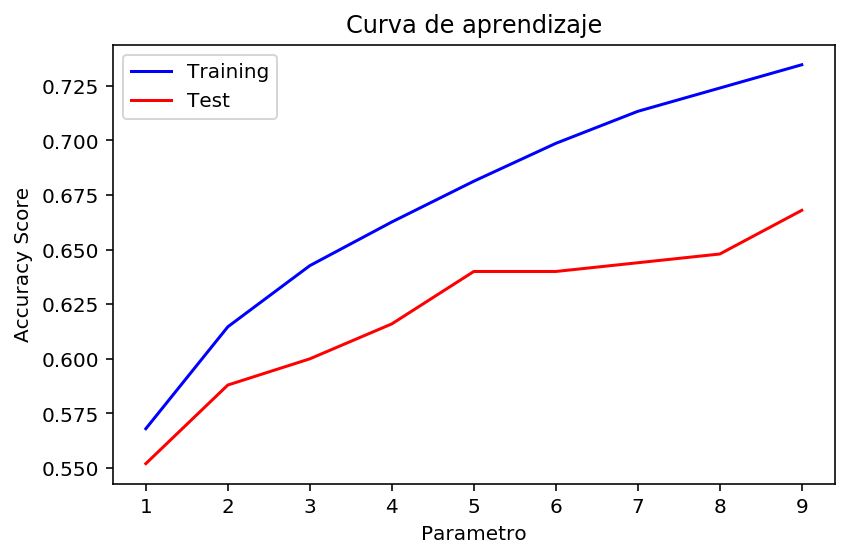

In [35]:
import matplotlib.pyplot as plt
#Definimos dos vectores para poder guardar los datos según la profundidad
train_accuracy =[]
test_accuracy = []

max_depth = range (1,10)
for md in max_depth:
    tree_classifier = tree.DecisionTreeClassifier(max_depth = md, random_state = 42)
    tree_classifier.fit(train_vector_dataB, train_target)
    
    tree_train_predictions = tree_classifier.predict(train_vector_dataB)
    tree_test_predictions = tree_classifier.predict(test_vector_dataB)
    
    train_accuracy.append(np.mean(tree_train_predictions == train_target))
    test_accuracy.append(np.mean(tree_test_predictions== test_target))
    
    
plt.plot(max_depth, train_accuracy, color="b",  label="Training")
plt.plot(max_depth, test_accuracy, color="r", label="Test")
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

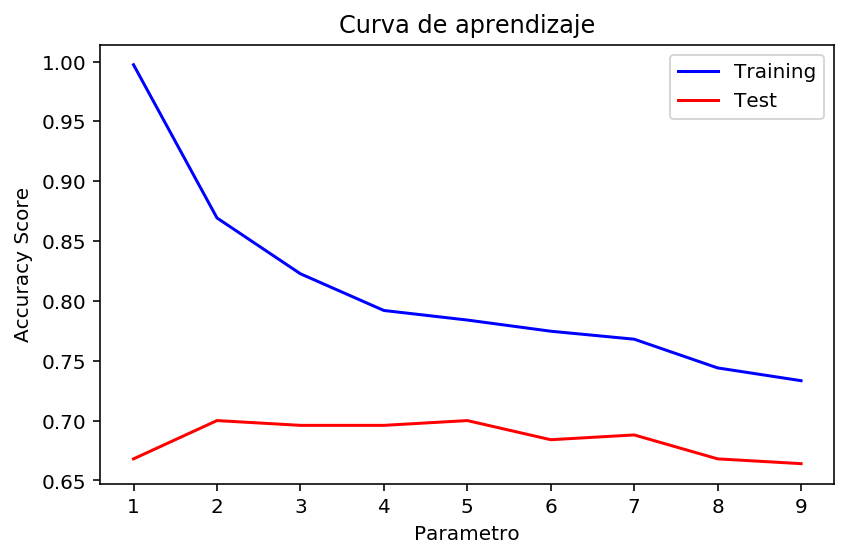

In [32]:
train_accuracy =[]
test_accuracy = []

min_samp_leaf = range (1,10)
for msl in min_samp_leaf:
    tree_classifier = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =msl)
    tree_classifier.fit(train_vector_dataB, train_target)
    
    tree_train_predictions = tree_classifier.predict(train_vector_dataB)
    tree_test_predictions = tree_classifier.predict(test_vector_dataB)
    
    train_accuracy.append(np.mean(tree_train_predictions == train_target))
    test_accuracy.append(np.mean(tree_test_predictions== test_target))
    
    
plt.plot(min_samp_leaf, train_accuracy, color="b",  label="Training")
plt.plot(min_samp_leaf, test_accuracy, color="r", label="Test")
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

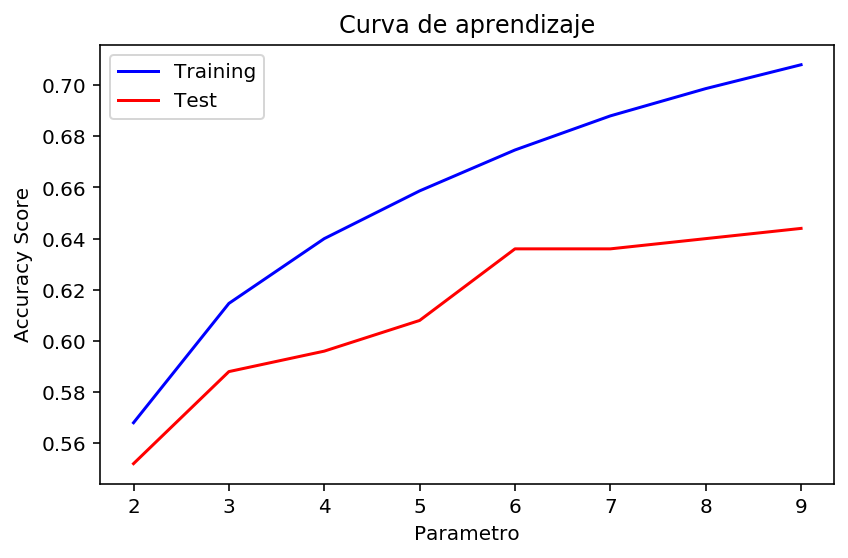

In [34]:
train_accuracy =[]
test_accuracy = []

max_leaf_nodes = range (2,10)
for mln in max_leaf_nodes:
    tree_classifier = tree.DecisionTreeClassifier(random_state = 42, max_leaf_nodes=mln)
    tree_classifier.fit(train_vector_dataB, train_target)
    
    tree_train_predictions = tree_classifier.predict(train_vector_dataB)
    tree_test_predictions = tree_classifier.predict(test_vector_dataB)
    
    train_accuracy.append(np.mean(tree_train_predictions == train_target))
    test_accuracy.append(np.mean(tree_test_predictions== test_target))
    
    
plt.plot(max_leaf_nodes, train_accuracy, color="b",  label="Training")
plt.plot(max_leaf_nodes, test_accuracy, color="r", label="Test")
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Comparando las gráficas el parámetro que nos permite optimizar (e incluso mejorar) el rendimiento del árbol es **min_samples_leaf** así que buscaremos el mejor valor para el mismo en los siguientes árboles.

In [65]:
# Creamos el clasificador con los valores óptimos
tree_classifierB = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =2)
tree_classifierB.fit(train_vector_dataB, train_target)

tree_train_predictionsB = tree_classifierB.predict(train_vector_dataB)
tree_test_predictionsB = tree_classifierB.predict(test_vector_dataB)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictionsB == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictionsB == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.8693333333333333
Árbol, porcentaje de aciertos en test: 0.7


### NAIVE BAYES (1,1) Binary

In [24]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifierB = MultinomialNB()

mnb_classifierB.fit(train_vector_dataB, train_target)

mnb_train_predictionsB = mnb_classifierB.predict(train_vector_dataB)
mnb_test_predictionsB = mnb_classifierB.predict(test_vector_dataB)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictionsB == train_target))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictionsB == test_target))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9506666666666667
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.764


In [25]:
from sklearn.naive_bayes import GaussianNB

gnb_classifierB = GaussianNB()

chunk_size=100
num_rows=len(train_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_vector_dataB[i*chunk_size : (i+1)*chunk_size,:].toarray()
    target_chunk = train_target[i*chunk_size : (i+1)*chunk_size]
    gnb_classifierB.partial_fit(train_chunk, target_chunk, classes=np.unique(train_target))
#Separar los arrays para que sea más eficiente, lo dividimos así para no sobrecargar la memoria 
gnb_train_predictionsB=np.zeros_like(train_target)
gnb_test_predictionsB=np.zeros_like(test_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_vector_dataB[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_train_predictionsB[i*chunk_size : (i+1)*chunk_size] = gnb_classifierB.predict(train_chunk)
    
num_rows=len(test_target)
for i in range(0, (num_rows//chunk_size)):
    test_chunk = test_vector_dataB[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_test_predictionsB[i*chunk_size : (i+1)*chunk_size] = gnb_classifierB.predict(test_chunk)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictionsB == train_target))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictionsB == test_target))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.908
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.696


In [26]:
from sklearn.naive_bayes import ComplementNB

cnb_classifierB = ComplementNB()

cnb_classifierB.fit(train_vector_dataB, train_target)

cnb_train_predictionsB = cnb_classifierB.predict(train_vector_dataB)
cnb_test_predictionsB = cnb_classifierB.predict(test_vector_dataB)

print("Complement Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(cnb_train_predictionsB == train_target))
print("Complement Naive Bayes, porcentaje de aciertos en test:", np.mean(cnb_test_predictionsB == test_target))

Complement Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9573333333333334
Complement Naive Bayes, porcentaje de aciertos en test: 0.776


In [27]:
from sklearn.naive_bayes import BernoulliNB
bnb_classifierB = BernoulliNB()
bnb_classifierB.fit(train_vector_dataB, train_target)

bnb_train_predictionsB = bnb_classifierB.predict(train_vector_dataB)
bnb_test_predictionsB = bnb_classifierB.predict(test_vector_dataB)

print("Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(bnb_train_predictionsB == train_target))
print("Bernoulli Naive Bayes, porcentaje de aciertos en test:", np.mean(bnb_test_predictionsB == test_target))

Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9466666666666667
Bernoulli Naive Bayes, porcentaje de aciertos en test: 0.78


## NGRAM(1,1), TF/IDF

Creamos la bolsa de palabras con las frecuencias para poder obtener el valor TF/IDF de cada término.

In [37]:
vectorizerF = CountVectorizer(stop_words='english', ngram_range = (1,1), binary = False)
train_vector_dataF = vectorizerF.fit_transform(train_data)
feature_namesF = vectorizerF.get_feature_names()
test_vector_dataF = vectorizerF.transform(test_data)

In [38]:
tfidfer = TfidfTransformer()
train_preprocessedF = tfidfer.fit_transform(train_vector_dataF)
#test_vector_dataF = vectorizerF.transform(test_data)
test_preprocessedF = tfidfer.transform(test_vector_dataF)

In [39]:
write_terms(feature_namesF, train_data, train_preprocessedF, 6)
write_terms(feature_namesF, train_data, train_preprocessedF, 27)
write_terms(feature_namesF, train_data, train_preprocessedF, 82)

Mensaje 6 : Point your finger at any item on the menu, order it and you won't be disappointed.	1
Mensaje 6 vectorizado: ['disappointed' 'finger' 'item' 'menu' 'order' 'point' 'won'] 

Mensaje 27 : Good value, great food, great service.	1
Mensaje 27 vectorizado: ['food' 'good' 'great' 'service' 'value'] 

Mensaje 82 : The food was great as always, compliments to the chef.	1
Mensaje 82 vectorizado: ['chef' 'compliments' 'food' 'great'] 



### Arbol (1,1) TF/IDF

In [40]:
# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier(random_state = 42)
tree_classifier.fit(train_preprocessedF, train_target)

tree_train_predictions = tree_classifier.predict(train_preprocessedF)
tree_test_predictions = tree_classifier.predict(test_preprocessedF)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.692


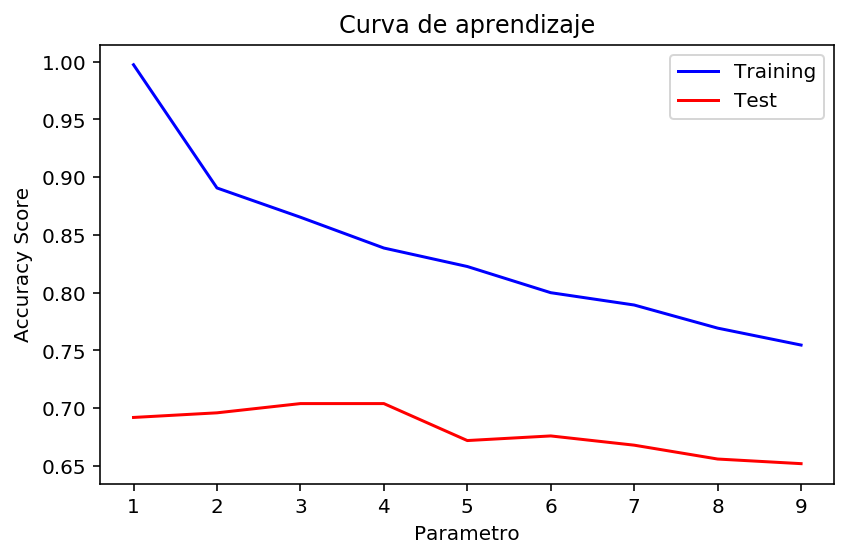

In [41]:
train_accuracy =[]
test_accuracy = []

min_samp_leaf = range (1,10)
for msl in min_samp_leaf:
    tree_classifier = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =msl)
    tree_classifier.fit(train_preprocessedF, train_target)
    
    tree_train_predictions = tree_classifier.predict(train_preprocessedF)
    tree_test_predictions = tree_classifier.predict(test_preprocessedF)
    
    train_accuracy.append(np.mean(tree_train_predictions == train_target))
    test_accuracy.append(np.mean(tree_test_predictions== test_target))
    
    
plt.plot(min_samp_leaf, train_accuracy, color="b",  label="Training")
plt.plot(min_samp_leaf, test_accuracy, color="r", label="Test")
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [66]:
# Creamos el clasificador con los valores óptimos
tree_classifierF = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =4)
tree_classifierF.fit(train_preprocessedF, train_target)

tree_train_predictionsF = tree_classifierF.predict(train_preprocessedF)
tree_test_predictionsF = tree_classifierF.predict(test_preprocessedF)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictionsF == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictionsF == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.8386666666666667
Árbol, porcentaje de aciertos en test: 0.704


### NAIVE BAYES (1,1) TF/IDF

In [35]:
mnb_classifierF = MultinomialNB()

mnb_classifierF.fit(train_preprocessedF, train_target)

mnb_train_predictionsF = mnb_classifierF.predict(train_preprocessedF)
mnb_test_predictionsF = mnb_classifierF.predict(test_preprocessedF)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictionsF == train_target))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictionsF == test_target))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9613333333333334
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.772


In [36]:
gnb_classifierF = GaussianNB()

chunk_size=100
num_rows=len(train_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_preprocessedF[i*chunk_size : (i+1)*chunk_size,:].toarray()
    target_chunk = train_target[i*chunk_size : (i+1)*chunk_size]
    gnb_classifierF.partial_fit(train_chunk, target_chunk, classes=np.unique(train_target))
#Separar los arrays para que sea más eficiente, lo dividimos así para no sobrecargar la memoria 
gnb_train_predictionsF=np.zeros_like(train_target)
gnb_test_predictionsF=np.zeros_like(test_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_preprocessedF[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_train_predictionsF[i*chunk_size : (i+1)*chunk_size] = gnb_classifierF.predict(train_chunk)
    
num_rows=len(test_target)
for i in range(0, (num_rows//chunk_size)):
    test_chunk = test_preprocessedF[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_test_predictionsF[i*chunk_size : (i+1)*chunk_size] = gnb_classifierF.predict(test_chunk)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictionsF == train_target))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictionsF == test_target))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9133333333333333
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.696


In [37]:
cnb_classifierF = ComplementNB()

cnb_classifierF.fit(train_preprocessedF, train_target)

cnb_train_predictionsF = cnb_classifierF.predict(train_preprocessedF)
cnb_test_predictionsF = cnb_classifierF.predict(test_preprocessedF)

print("Complement Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(cnb_train_predictionsF == train_target))
print("Complement Naive Bayes, porcentaje de aciertos en test:", np.mean(cnb_test_predictionsF == test_target))

Complement Naive Bayes, porcentaje de aciertos en entrenamiento: 0.968
Complement Naive Bayes, porcentaje de aciertos en test: 0.788


In [38]:
bnb_classifierF = BernoulliNB()
bnb_classifierF.fit(train_preprocessedF, train_target)

bnb_train_predictionsF = bnb_classifierF.predict(train_preprocessedF)
bnb_test_predictionsF = bnb_classifierF.predict(test_preprocessedF)

print("Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(bnb_train_predictionsF == train_target))
print("Bernoulli Naive Bayes, porcentaje de aciertos en test:", np.mean(bnb_test_predictionsF == test_target))

Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9466666666666667
Bernoulli Naive Bayes, porcentaje de aciertos en test: 0.78


## NGRAM(1,2), BINARY

In [11]:
vectorizerB2 = CountVectorizer(stop_words='english', ngram_range = (1,2), binary = True)

train_vector_dataB2 = vectorizerB2.fit_transform(train_data)
feature_namesB2 = vectorizerB2.get_feature_names()
test_vector_dataB2 =vectorizerB2.transform(test_data)

In [16]:
write_terms(feature_namesB2, train_data, train_vector_dataB2, 6)
write_terms(feature_namesB2, train_data, train_vector_dataB2, 27)
write_terms(feature_namesB2, train_data, train_vector_dataB2, 82)

Mensaje 6 : Point your finger at any item on the menu, order it and you won't be disappointed.	1
Mensaje 6 vectorizado: ['disappointed' 'finger' 'finger item' 'item' 'item menu' 'menu'
 'menu order' 'order' 'order won' 'point' 'point finger' 'won'
 'won disappointed'] 

Mensaje 27 : Good value, great food, great service.	1
Mensaje 27 vectorizado: ['food' 'food great' 'good' 'good value' 'great' 'great food'
 'great service' 'service' 'value' 'value great'] 

Mensaje 82 : The food was great as always, compliments to the chef.	1
Mensaje 82 vectorizado: ['chef' 'compliments' 'compliments chef' 'food' 'food great' 'great'
 'great compliments'] 



### Arbol(1,2) Binary

In [17]:
# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier(random_state = 42)
tree_classifier.fit(train_vector_dataB2, train_target)

tree_train_predictions = tree_classifier.predict(train_vector_dataB2)
tree_test_predictions = tree_classifier.predict(test_vector_dataB2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.672


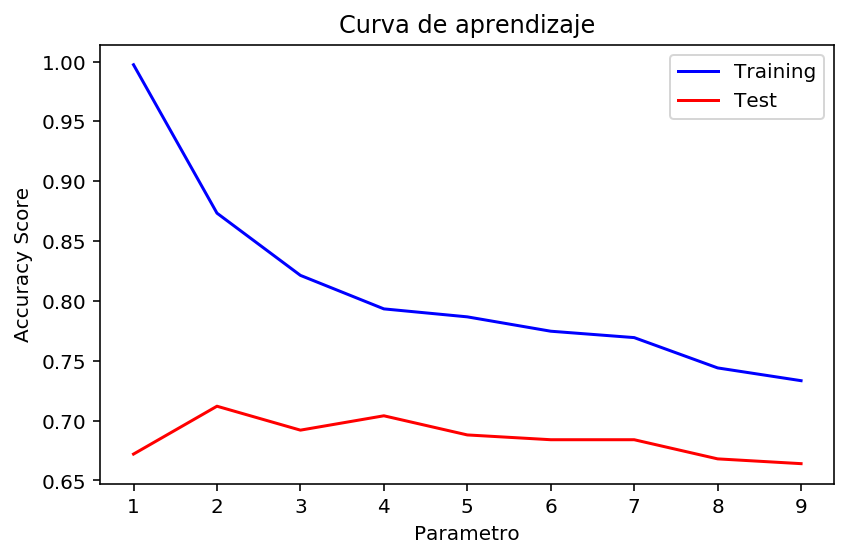

In [18]:
train_accuracy =[]
test_accuracy = []

min_samp_leaf = range (1,10)
for msl in min_samp_leaf:
    tree_classifier = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =msl)
    tree_classifier.fit(train_vector_dataB2, train_target)
    
    tree_train_predictions = tree_classifier.predict(train_vector_dataB2)
    tree_test_predictions = tree_classifier.predict(test_vector_dataB2)
    
    train_accuracy.append(np.mean(tree_train_predictions == train_target))
    test_accuracy.append(np.mean(tree_test_predictions== test_target))
    
    
plt.plot(min_samp_leaf, train_accuracy, color="b",  label="Training")
plt.plot(min_samp_leaf, test_accuracy, color="r", label="Test")
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [12]:
# Creamos el clasificador con los valores óptimos
tree_classifierB2 = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =2)
tree_classifierB2.fit(train_vector_dataB2, train_target)

tree_train_predictionsB2 = tree_classifierB2.predict(train_vector_dataB2)
tree_test_predictionsB2 = tree_classifierB2.predict(test_vector_dataB2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictionsB2 == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictionsB2 == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.8733333333333333
Árbol, porcentaje de aciertos en test: 0.712


### NAIVE BAYES (1,2) Binary

In [44]:
mnb_classifierB2 = MultinomialNB()

mnb_classifierB2.fit(train_vector_dataB2, train_target)

mnb_train_predictionsB2 = mnb_classifierB2.predict(train_vector_dataB2)
mnb_test_predictionsB2 = mnb_classifierB2.predict(test_vector_dataB2)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictionsB2 == train_target))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictionsB2 == test_target))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9773333333333334
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.772


In [45]:
gnb_classifierB2 = GaussianNB()

chunk_size=100
num_rows=len(train_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_vector_dataB2[i*chunk_size : (i+1)*chunk_size,:].toarray()
    target_chunk = train_target[i*chunk_size : (i+1)*chunk_size]
    gnb_classifierB2.partial_fit(train_chunk, target_chunk, classes=np.unique(train_target))
#Separar los arrays para que sea más eficiente, lo dividimos así para no sobrecargar la memoria 
gnb_train_predictionsB2 =np.zeros_like(train_target)
gnb_test_predictionsB2 =np.zeros_like(test_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_vector_dataB2[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_train_predictionsB2[i*chunk_size : (i+1)*chunk_size] = gnb_classifierB2.predict(train_chunk)
    
num_rows=len(test_target)
for i in range(0, (num_rows//chunk_size)):
    test_chunk = test_vector_dataB2[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_test_predictionsB2[i*chunk_size : (i+1)*chunk_size] = gnb_classifierB2.predict(test_chunk)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictionsB2 == train_target))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictionsB2 == test_target))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.928
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.7


In [46]:
cnb_classifierB2 = ComplementNB()

cnb_classifierB2.fit(train_vector_dataB2, train_target)

cnb_train_predictionsB2 = cnb_classifierB2.predict(train_vector_dataB2)
cnb_test_predictionsB2 = cnb_classifierB2.predict(test_vector_dataB2)

print("Complement Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(cnb_train_predictionsB2 == train_target))
print("Complement Naive Bayes, porcentaje de aciertos en test:", np.mean(cnb_test_predictionsB2 == test_target))

Complement Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9813333333333333
Complement Naive Bayes, porcentaje de aciertos en test: 0.784


In [47]:
bnb_classifierB2 = BernoulliNB()
bnb_classifierB2.fit(train_vector_dataB2, train_target)

bnb_train_predictionsB2 = bnb_classifierB2.predict(train_vector_dataB2)
bnb_test_predictionsB2 = bnb_classifierB2.predict(test_vector_dataB2)

print("Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(bnb_train_predictionsB2 == train_target))
print("Bernoulli Naive Bayes, porcentaje de aciertos en test:", np.mean(bnb_test_predictionsB2 == test_target))

Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9773333333333334
Bernoulli Naive Bayes, porcentaje de aciertos en test: 0.78


## NGRAM(1,2), TF/IDF

Creamos la bolsa de palabras con las frecuencias para poder obtener el valor TF/IDF de cada término.

In [10]:
vectorizerF2 = CountVectorizer(stop_words='english', ngram_range = (1,2), binary = False)
train_vector_dataF2 = vectorizerF2.fit_transform(train_data)
feature_namesF2 = vectorizerF2.get_feature_names()
test_vector_dataF2 = vectorizerF2.transform(test_data)

In [11]:
tfidfer = TfidfTransformer()
train_preprocessedF2 = tfidfer.fit_transform(train_vector_dataF2)

#test_vector_dataF2 = vectorizerF2.transform(test_data)
test_preprocessedF2 = tfidfer.transform(test_vector_dataF2)

In [23]:
write_terms(feature_namesF2, train_data, train_preprocessedF2, 6)
write_terms(feature_namesF2, train_data, train_preprocessedF2, 27)
write_terms(feature_namesF2, train_data, train_preprocessedF2, 82)

Mensaje 6 : Point your finger at any item on the menu, order it and you won't be disappointed.	1
Mensaje 6 vectorizado: ['disappointed' 'finger' 'finger item' 'item' 'item menu' 'menu'
 'menu order' 'order' 'order won' 'point' 'point finger' 'won'
 'won disappointed'] 

Mensaje 27 : Good value, great food, great service.	1
Mensaje 27 vectorizado: ['food' 'food great' 'good' 'good value' 'great' 'great food'
 'great service' 'service' 'value' 'value great'] 

Mensaje 82 : The food was great as always, compliments to the chef.	1
Mensaje 82 vectorizado: ['chef' 'compliments' 'compliments chef' 'food' 'food great' 'great'
 'great compliments'] 



### Arbol (1,2) TF/IDF

In [62]:
# Creamos el clasificador con los valores por defecto
tree_classifier = tree.DecisionTreeClassifier(random_state = 42)
tree_classifier.fit(train_preprocessedF2, train_target)

tree_train_predictions = tree_classifier.predict(train_preprocessedF2)
tree_test_predictions = tree_classifier.predict(test_preprocessedF2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictions == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictions == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.9973333333333333
Árbol, porcentaje de aciertos en test: 0.668


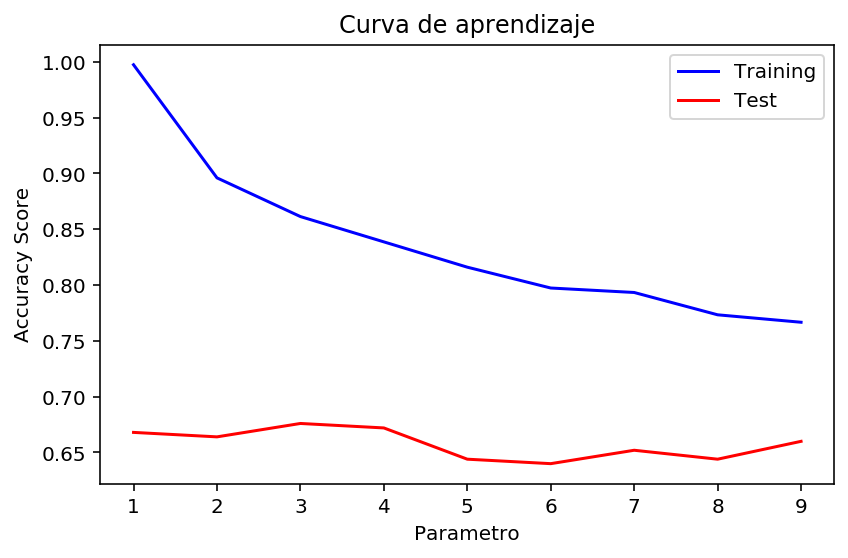

In [70]:
train_accuracy =[]
test_accuracy = []

min_samp_leaf = range (1,10)
for msl in min_samp_leaf:
    tree_classifier = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =msl)
    tree_classifier.fit(train_preprocessedF2, train_target)
    
    tree_train_predictions = tree_classifier.predict(train_preprocessedF2)
    tree_test_predictions = tree_classifier.predict(test_preprocessedF2)
    
    train_accuracy.append(np.mean(tree_train_predictions == train_target))
    test_accuracy.append(np.mean(tree_test_predictions== test_target))
    
    
plt.plot(min_samp_leaf, train_accuracy, color="b",  label="Training")
plt.plot(min_samp_leaf, test_accuracy, color="r", label="Test")
%config InlineBackend.figure_format ='retina'
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

In [74]:
# Creamos el clasificador con los valores óptimos
tree_classifierF2 = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =3)
tree_classifierF2.fit(train_preprocessedF2, train_target)

tree_train_predictionsF2 = tree_classifierF2.predict(train_preprocessedF2)
tree_test_predictionsF2 = tree_classifierF2.predict(test_preprocessedF2)

print("Árbol, porcentaje de aciertos en entrenamiento:", np.mean(tree_train_predictionsF2 == train_target))
print("Árbol, porcentaje de aciertos en test:", np.mean(tree_test_predictionsF2 == test_target))

Árbol, porcentaje de aciertos en entrenamiento: 0.8613333333333333
Árbol, porcentaje de aciertos en test: 0.676


### NAIVE BAYES(1,2) TF/IDF

In [54]:
mnb_classifierF2 = MultinomialNB()

mnb_classifierF2.fit(train_preprocessedF2, train_target)

mnb_train_predictionsF2 = mnb_classifierF2.predict(train_preprocessedF2)
mnb_test_predictionsF2 = mnb_classifierF2.predict(test_preprocessedF2)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictionsF2 == train_target))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictionsF2 == test_target))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9893333333333333
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.784


In [55]:
gnb_classifierF2 = GaussianNB()

chunk_size=100
num_rows=len(train_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_preprocessedF2[i*chunk_size : (i+1)*chunk_size,:].toarray()
    target_chunk = train_target[i*chunk_size : (i+1)*chunk_size]
    gnb_classifierF2.partial_fit(train_chunk, target_chunk, classes=np.unique(train_target))
#Separar los arrays para que sea más eficiente, lo dividimos así para no sobrecargar la memoria 
gnb_train_predictionsF2=np.zeros_like(train_target)
gnb_test_predictionsF2=np.zeros_like(test_target)

for i in range(0, (num_rows//chunk_size)):
    train_chunk = train_preprocessedF2[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_train_predictionsF2[i*chunk_size : (i+1)*chunk_size] = gnb_classifierF2.predict(train_chunk)
    
num_rows=len(test_target)
for i in range(0, (num_rows//chunk_size)):
    test_chunk = test_preprocessedF2[i*chunk_size : (i+1)*chunk_size,:].toarray()
    gnb_test_predictionsF2[i*chunk_size : (i+1)*chunk_size] = gnb_classifierF2.predict(test_chunk)

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictionsF2 == train_target))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictionsF2 == test_target))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 0.932
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.708


In [24]:
from sklearn.naive_bayes import ComplementNB
cnb_classifierF2 = ComplementNB()

cnb_classifierF2.fit(train_preprocessedF2, train_target)

cnb_train_predictionsF2 = cnb_classifierF2.predict(train_preprocessedF2)
cnb_test_predictionsF2 = cnb_classifierF2.predict(test_preprocessedF2)

print("Complement Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(cnb_train_predictionsF2 == train_target))
print("Complement Naive Bayes, porcentaje de aciertos en test:", np.mean(cnb_test_predictionsF2 == test_target))

Complement Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9933333333333333
Complement Naive Bayes, porcentaje de aciertos en test: 0.8


In [57]:
bnb_classifierF2 = BernoulliNB()
bnb_classifierF2.fit(train_preprocessedF2, train_target)

bnb_train_predictionsF2 = bnb_classifierF2.predict(train_preprocessedF2)
bnb_test_predictionsF2 = bnb_classifierF2.predict(test_preprocessedF2)

print("Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(bnb_train_predictionsF2 == train_target))
print("Bernoulli Naive Bayes, porcentaje de aciertos en test:", np.mean(bnb_test_predictionsF2 == test_target))

Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9773333333333334
Bernoulli Naive Bayes, porcentaje de aciertos en test: 0.78


Hemos visto que para cada bolsa de palabras los vectores generados para cada mensaje eran bastante similares, veamos cómo ha podido afectar a los resultados de los clasificadores.

# Resultados de los clasificadores

- **bolsa de ngramas(1,1) binaria**: <br>Bernoulli Naive Bayes, porcentaje de aciertos en entrenamiento: 0.946, porcentaje de aciertos en test: 0.78<br>Árbol, porcentaje de aciertos en entrenamiento: 0.869, porcentaje de aciertos en test: 0.7


- **bolsa de ngramas(1,1) TF/IDF**: <br>Complement Naive Bayes, porcentaje de aciertos en entrenamiento: 0.968, porcentaje de aciertos en test: 0.788<br>Árbol, porcentaje de aciertos en entrenamiento: 0.838, porcentaje de aciertos en test: 0.704


- **bolsa de ngramas(1,2) binaria**: <br>Complement Naive Bayes, porcentaje de aciertos en entrenamiento: 0.981, porcentaje de aciertos en test: 0.784<br>Árbol, porcentaje de aciertos en entrenamiento: 0.873, porcentaje de aciertos en test: 0.712 


- **bolsa de ngramas(1,2) TF/IDF**: <br>Complement Naive Bayes, porcentaje de aciertos en entrenamiento: 0.993, porcentaje de aciertos en test: 0.8 <br> Árbol, porcentaje de aciertos en entrenamiento: 0.861, porcentaje de aciertos en test: 0.676



Comparando los resultados destaca con una clara superioridad el clasificador Complement Naive Bayes o Naive Bayes Multinomial Binarizado, sobre todo en comparación con los resultados del árbol de decisión que mejora en torno a un 10%.

Podemos observar cómo a medida que añadimos complejidad a la vectorización los resultados que ofrece el árbol no mejoran de manera significativa y en el último caso y de mayor complejidad éstos decaen; mientras que con unos resultados que mejoran a medida que aumentamos la complejidad, el clasificador Naive Bayes gana en precisión.<br> 
Los árboles de decisión son muy efectivos en general como clasificadores pero en el caso de clasificación de textos sufren en comparación con el Naive Bayes debido a que determinadas variables o clases se pueden considerar como despreciables debido a su poca probabilidad de aparición o su poca frecuencia, esto añadido, por ejemplo, a la complejidad de una bolsa con bigramas y valores TF/IDF dificulta el trabajo del árbol de encontrar las clases determinantes y a su vez la comprensión del mismo.<br> 
Por otra parte los clasificadores que utilizan el método Naive Bayes tienen en cuenta desde las variables más frecuentes hasta las que no llegan a aparecer (solventando este problema con el alisado). Tal es su método de aprendizaje que al proporcionarle bigramas o el valor TF/IDF de una bolsa de palabras con respecto a su corpus, ésto permite ponderar mejor al clasificador la relevancia de las variables dentro de cada clase. 

# Variables discriminatorias

## Árbol

Vamos a obtener las palabras con más relevancia según el árbol y evaluarlas.

En este caso el que mejores resultados ha dado ha sido el árbol entrenado con la bolsa de bigramas y matriz binaria.

In [84]:
def print_top25_features_in_trees(vectorizerB2, clf):
    """Prints features with the highest coefficient values"""
    feature_namesB2 = vectorizerB2.get_feature_names()
    
    top25 = np.argsort(clf.feature_importances_)[-25:]
    reversed_top = top25[::-1]
    print("Top 25 features in the tree\n")
    print("%s" % ( " / ".join(feature_namesB2[j] for j in reversed_top)))

In [85]:
print_top25_features_in_trees(vectorizerB2,tree_classifierB2)

Top 25 features in the tree

great / good / delicious / nice / amazing / awesome / love / place / excellent / friendly / fantastic / best / vegas / loved / perfect / fun / service / don / restaurants / town / tender / visit / patio / incredible / won disappointed


Encontramos una mayor predominancia de palabras que infieren **sentimiento positivo**: great, good, delicious, nice, amazing, awesome, love, excellent, friendly, fantastic, best, loved, perfect, fun, incredible (15/25) mientras que de aquellas que no pertenecen a este grupo podríamos clasificar con bastante certeza 'won disappointed' (debido a la propia palabra disappointed) como palabras de **sentimiento negativo**.<br> Consideramos el resto de palabras como **ruido** ya que no refieren de manera directa a un sentimiento, sin embargo profundizaremos para averiguar porqué se encuentran ahí y a qué sentimiento se asocian. 

Como trabajamos con un árbol de decisión que utiliza una bolsa de palabras **binaria**, la hipótesis que planteamos es que dichas palabras son las más discriminatorias de su clase debido a que tienen el mayor porcentaje de clasificicación por aparición, ie. la mayor parte de los textos en los que aparecen (1 en la fila para la columna de la variable) comparten la misma clasificación: 0 si el sentimiento es negativo y 1 si es positivo.<br>A pesar de estar trabajando con una bolsa de bigramas, las palabras que discriminan mejor son monogramas.<br>Vamos a extraer, en porcentaje, la clasificación de los textos en los que aparecen. Dado que la clasificación está representada en binario si el porcentaje se acerca a 1 dicha variable aparecerá mayormente en textos positivos, por otro lado si se acerca a 0 aparecerá mayormente en textos con valoración negativa.

In [13]:
#creamos el data frame y almacenamos la bolsa de palabras correspondiente y añadimos el target de cada texto en la matriz
dfB2=pd.DataFrame(data= train_vector_dataB2.toarray(), columns=feature_namesB2)
dfB2['target'] = train_target

In [14]:
#guardamos en una lista las variables que queremos evaluar (identificadas por el árbol como relevantes)
feature_namesB2 = vectorizerB2.get_feature_names()
top25 = np.argsort(tree_classifierB2.feature_importances_)[-25:]
reversed_top = top25[::-1]
features = []
for j in reversed_top:
    features.append(feature_namesB2[j]) 
features = np.array(features)

En la siguiente función almacenaremos para cada variable: el nº de textos del corpus en los que aparece (DF) y la media de la clasificación de los textos en los que aparece.

In [15]:
def array_triplas(df,indexes,target_column):
    features_mean = []
    #metemos en el array triplas que contienen: variable, nº de textos en los que aparece, media de los resultados
    for i in indexes:
        features_mean.append([i,len((df.loc[df[i] == 1][target_column]).array),np.mean((df.loc[df[i] == 1][target_column]).array)])
    return pd.DataFrame(features_mean, columns=['features','doc_freq','mean'])

In [16]:
dfFeatures = array_triplas(dfB2, features,'target')
#añadimos el sentimiento que infiere por proximidad de valor: positivo[1..,0.5,..0]negativo
v = np.array(dfFeatures[['mean']])
sent = []
for i in v:
    if i >= 0.5:
        sent.append(1)
    else:
        sent.append(0)
dfFeatures['sent'] = sent

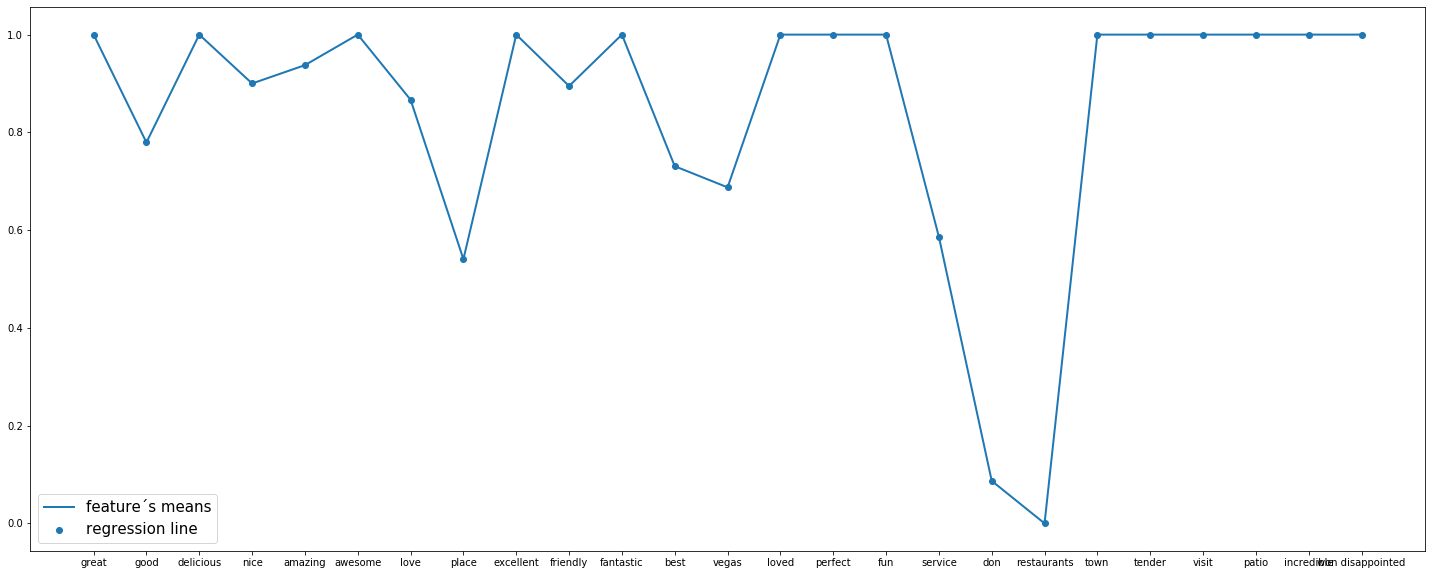

In [17]:
values = dfFeatures[['mean']]
plt.figure(figsize=(25, 10))
plt.scatter(features,values)
plt.plot(features,values,linewidth=2.0);
plt.legend(['feature´s means', 'regression line'], loc='lower left', fontsize = 15)

In [83]:
dfFeatures

,features,doc_freq,mean,sent
0,great,54,1.000000,1
1,good,68,0.779412,1
2,delicious,21,1.000000,1
3,nice,20,0.900000,1
4,amazing,16,0.937500,1
5,awesome,11,1.000000,1
6,love,15,0.866667,1
7,place,74,0.540541,1
8,excellent,8,1.000000,1
9,friendly,19,0.894737,1


Las variables más discriminatorias que selecciona el árbol y habíamos considerado como positivas tienen, en efecto, porcentajes muy altos. Refieren a sentimiento negativo 'don' y 'restaurants' que de 23 textos en los que aparece el 92% se consideran críticas negativas para el primero y el 100% de los 3 en que aparece el segundo son valorados negativamente.<br>
Respecto a las demás que no habíamos clasificado a priori, también pertenecen al grupo de las que se asocian con un sentimiento positivo dando una gran predominancia a éstas (23/25) y es que, en suma, aparenecen en más textos del corpus (doc_freq) que aquellas más discriminatorias del sentimiento negativo: podemos observar en la gráfica cómo para gran parte de las clases, éstas fluctúan cerca de 0.8.<br> Aunque hayamos obtenido cómo clasifica el árbol estas clases, consideramos ruido palabras del estilo de 'visit' o 'patio' que a pesar de tener una clase bien definida no son términos que relfejen un sentimiento en un contexto humano.

Estos resultados nos dan una razón de la valoración de estas variables por parte del árbol como más relevantes, ya que al aparecer una de éstas en un texto se puede predecir con bastante precisión el sentimiento del mismo.<br> El hecho de que la mayor parte cuente con porcentajes próximos a los extremos (16 cuentan con valor mayor que 0.9 y 2 de ellas con prácticamente 0) explica la aparición de estas palabras y su valoración como más discriminatorias.<br>Destacamos 'place' y 'service' debido a la ambigüedad de las mismas, sobre todo en lo que a críticas de restaurantes refiere, pero podemos observar que ambas aparecen en gran cantidad de documentos del corpus (74 y 58) lo que les da más peso a pesar de que el sentimiento que éstas infieren no se incline claramente hacia una de las dos clases (ambas cuentan con valores de media cernanos al 50%).

## Naive Bayes

In [94]:
def print_top25_features_per_class_in_NB(vectorizerF2, clf, target_names):
    """Prints features with the highest coefficient values, per class"""
    feature_namesF2 = vectorizerF2.get_feature_names()
    print("Top 25 features per class\n")
    for i, target_names in enumerate(target_names):
        top25 = np.argsort(clf.feature_log_prob_[i])[-25:]
        reversed_top = top25[::-1]
        
        print("%s: %s" % (target_names,
              " / ".join(feature_namesF2[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [95]:
print_top25_features_per_class_in_NB(vectorizerF2,cnb_classifierF2,target_names) 

Top 25 features per class

0: zero taste / hut / ignored went / ignored / ignore / idea good / idea / ians like / ians / hut coupons / husband said / imagine / husband ate / hunan style / hunan / humiliated worker / humiliated / human like / human hair / human / imagination / imagine smashburger / huevos rancheros / inch long / industry paradise 

1: like usual / place twice / place nice / feeling / place pho / place pretty / feel welcome / place really / place receives / place relax / favorite place / place stop / place tasty / place thumbs / place town / place tribute / place vegas / place madison / favorite / fav vegas / fav / fast service / place wrong / fast food / fast 



En este caso al trabajar con un clasificador Naive Bayes y valores TF/IDF para los términos de la bolsa de palabras esperamos aquellos con más relevancia según este valor y no por ello con más sentido. Esto se debe a que este clasificador, si bien es eficaz, no establece relación entre términos ni textos del corpus. <br>
Como consecuencia podemos ver que entre los términos más relevantes para el sentimiento negativo se encuentran bigramas como 'husband said' o 'husband ate' que a priori no infieren ningún sentimiento. De igual manera para aquellas con sentimiento positivo encontramos aquellas que se refieren a lugares como 'place tribute','place vegas','place madison' o incluso alguna que bien podría pertenecer a la clase contraria: 'place wrong'.

A parte de estas excepciones el clasificador ha extraido con bastante eficacia variables asociadas a cada clase que representan correctamente a la misma.<br>

-----------------------------------------------------------------------------------------------------------------------

En conclusión, ambos clasificadores son capaces de extraer e identificar términos del corpus de mayor relevancia y en ambos casos con una deficiencia bastante satisfactoria de ruido. Consideramos que el no haber encontrado prácticamente términos mal escritos o que no tengan sentido (morfológicamente hablando) es debido a su poca frecuencia en el corpus, ya que dichos términos no pudieron haber sido eliminados al extraer las stopwords debido a su escritura incorrecta, como podemos observar en las bolsas de palabras extraídas.

# PARTE B

In [25]:
#Los mejores resultados de árbol los conseguimos con ngrama(1,2) binarios.

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## Mejor árbol

In [31]:
names = ['positive', 'negative']
classifier=tree_classifierB2
predictions = tree_test_predictionsB2

print(classification_report(test_target, predictions, target_names=names))


confusion_matrix(test_target, predictions)

              precision    recall  f1-score   support

    positive       0.67      0.85      0.75       128
    negative       0.78      0.57      0.66       122

    accuracy                           0.71       250
   macro avg       0.73      0.71      0.70       250
weighted avg       0.73      0.71      0.71       250



array([[109,  19],
       [ 53,  69]], dtype=int64)

El mejor árbol es el que utiliza **ngrama(1,2) con bolsa de palabras binaria.** 

Aquí podemos ver la precisión y la exhaustividad de este clasificador. 

    La precisión se define como el ratio de el número de documentos relevantes recuperados de una clase entre el número de documentos recuperados otal. Se podría decir de una forma un tanto informal que de todas las críticas positivas consigue recuperar 67%, mientras que de las críticas negativas recupera un 78%.
    La exhaustividad viene a expresar la proporción de documentos relevantes recuperados de una clase, comparado con el total de los documentos que son relevantes de esa clase en el conjunto de datos, con total independencia de que estos se recuperen o no. De forma más informal podemos decir que el 85% de las veces que identifica una crítica como positiva realmente lo es, mientras que solo el 57% de las veces que la identifica como negativa realmente lo es.
   
Podemos concluir con estos resultados que la clase negativa se detecta bien pero incluye también muestras de otra clase, mientras que detecta peor la clase positiva pero cuando lo hace es muy fiable.<br>Por tanto no es homogéneo el comportamiento del clasificador ante ambas clases ya que es bastante más fiable con las clasificaciones positivas.

## Mejor Naive Bayes

In [32]:
classifier=cnb_classifierF2
predictions = cnb_test_predictionsF2

print(classification_report(test_target, predictions, target_names=names))


confusion_matrix(test_target, predictions)

              precision    recall  f1-score   support

    positive       0.83      0.77      0.80       128
    negative       0.77      0.84      0.80       122

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



array([[ 98,  30],
       [ 20, 102]], dtype=int64)

El mejor Complement Naive Bayes es el que utiliza **ngrama(1,2) TF/IDF.**
Aquí podemos ver la precisión y la exhaustividad de este clasificador. 

Teniendo en cuenta las deficiones anteriormente mencionadas: 

    Se podría decir que de todas las críticas positivas consigue recuperar 83%, mientras que de las críticas negativas recupera un 77%.
    Podemos decir que el 77% de las veces que identifica una crítica como positiva realmente lo es, mientras que el 84% de las veces que la identifica como negativa realmente lo es.

Podemos cloncluir que ambas clases se detectan y se separan de forma más similar que con el clasificador anterior: se detectan y se separan relativamente bien.<br> Dada la semejanza en los resultados consideramos que este clasificador se comporta de manera muy homogénea a la hora de tratar ambas clases como podemos ver en la f1-score.

Analizando los resultados previamente obtenidos tanto en la evaluación individual del método de cada clasificador como ahora con los resultados en base a su clasificación podemos profundizar en las características de cada uno:

- Una de las fortalezas del Naive Bayes es que tiene en cuenta todas las varaibles a la hora de identificar cada clase con una ponderación más ajustada. Esto ayuda a considerar variables poco frecuentes que discriminan muy bien y a descartar (ponderar apropiadamente) variables muy comunes que no serían de mucha relevancia, como nos muestran su precisión y exhaustividad. Por otro lado al considerar este modelo que todas las variables son independientes entre si e independientes del contexto ocurren casos en los que se filtran variables de una clase en la representación de la otra, como hemos podido ver extrayendo las palabras más identificativas por cada clase.
- En cuanto al árbol de decisión consigue identificar satisfactoriamente qué variables tienen un mayor peso en el corpus, sin embargo no las asocia a una clase. Hemos podido observar cómo esta característica se ha traducido en peores resultados a la hora de tener en cuenta la exhaustividad. Además éste clasificador se ve perjudicado al añadirle complejidad que, por otro lado, el Naive Bayes aprovecha para clasificar mejor (caso de los valores TF/IDF).

Los clasificadores no coinciden al identificar una clase mejor que la otra. Usando la medida de f1 el árbol identifica claramente mejor la clase positiva mientras que Naive Bayes clasifica mejor la clase negativa; aunque presenta, en general, resultados satisfactorios. <br>Si hay que elegir la clase que mejor se clasifica sería la positiva ya que tiene unos valores muy parecidos para ambos clasificadores (usando la medida f1), en torno al 80%.

En base a los datos recopilados y las conclusiones aquí extraídas, destaca por supremacía el clasificador **Naive Bayes** que se comporta muchisimo mejor que el árbol seleccionado, ya que no llega nunca a tener una exhaustividad tan baja como la que si tiene el árbol y los valores de precisión están más ajustados, además se comporta de forma bastante homogénea a la hora de clasificar. Además reacciona mejor ante el incremento de una complejidad que, al ser extraída del análisis de las variables y los textos del corpus (valores TF/IDF), no hace más que aportar datos para una mejor clasificación. Para concluir muestra, sin duda, los mejores resultados en el aprendizaje.

## Representación del árbol

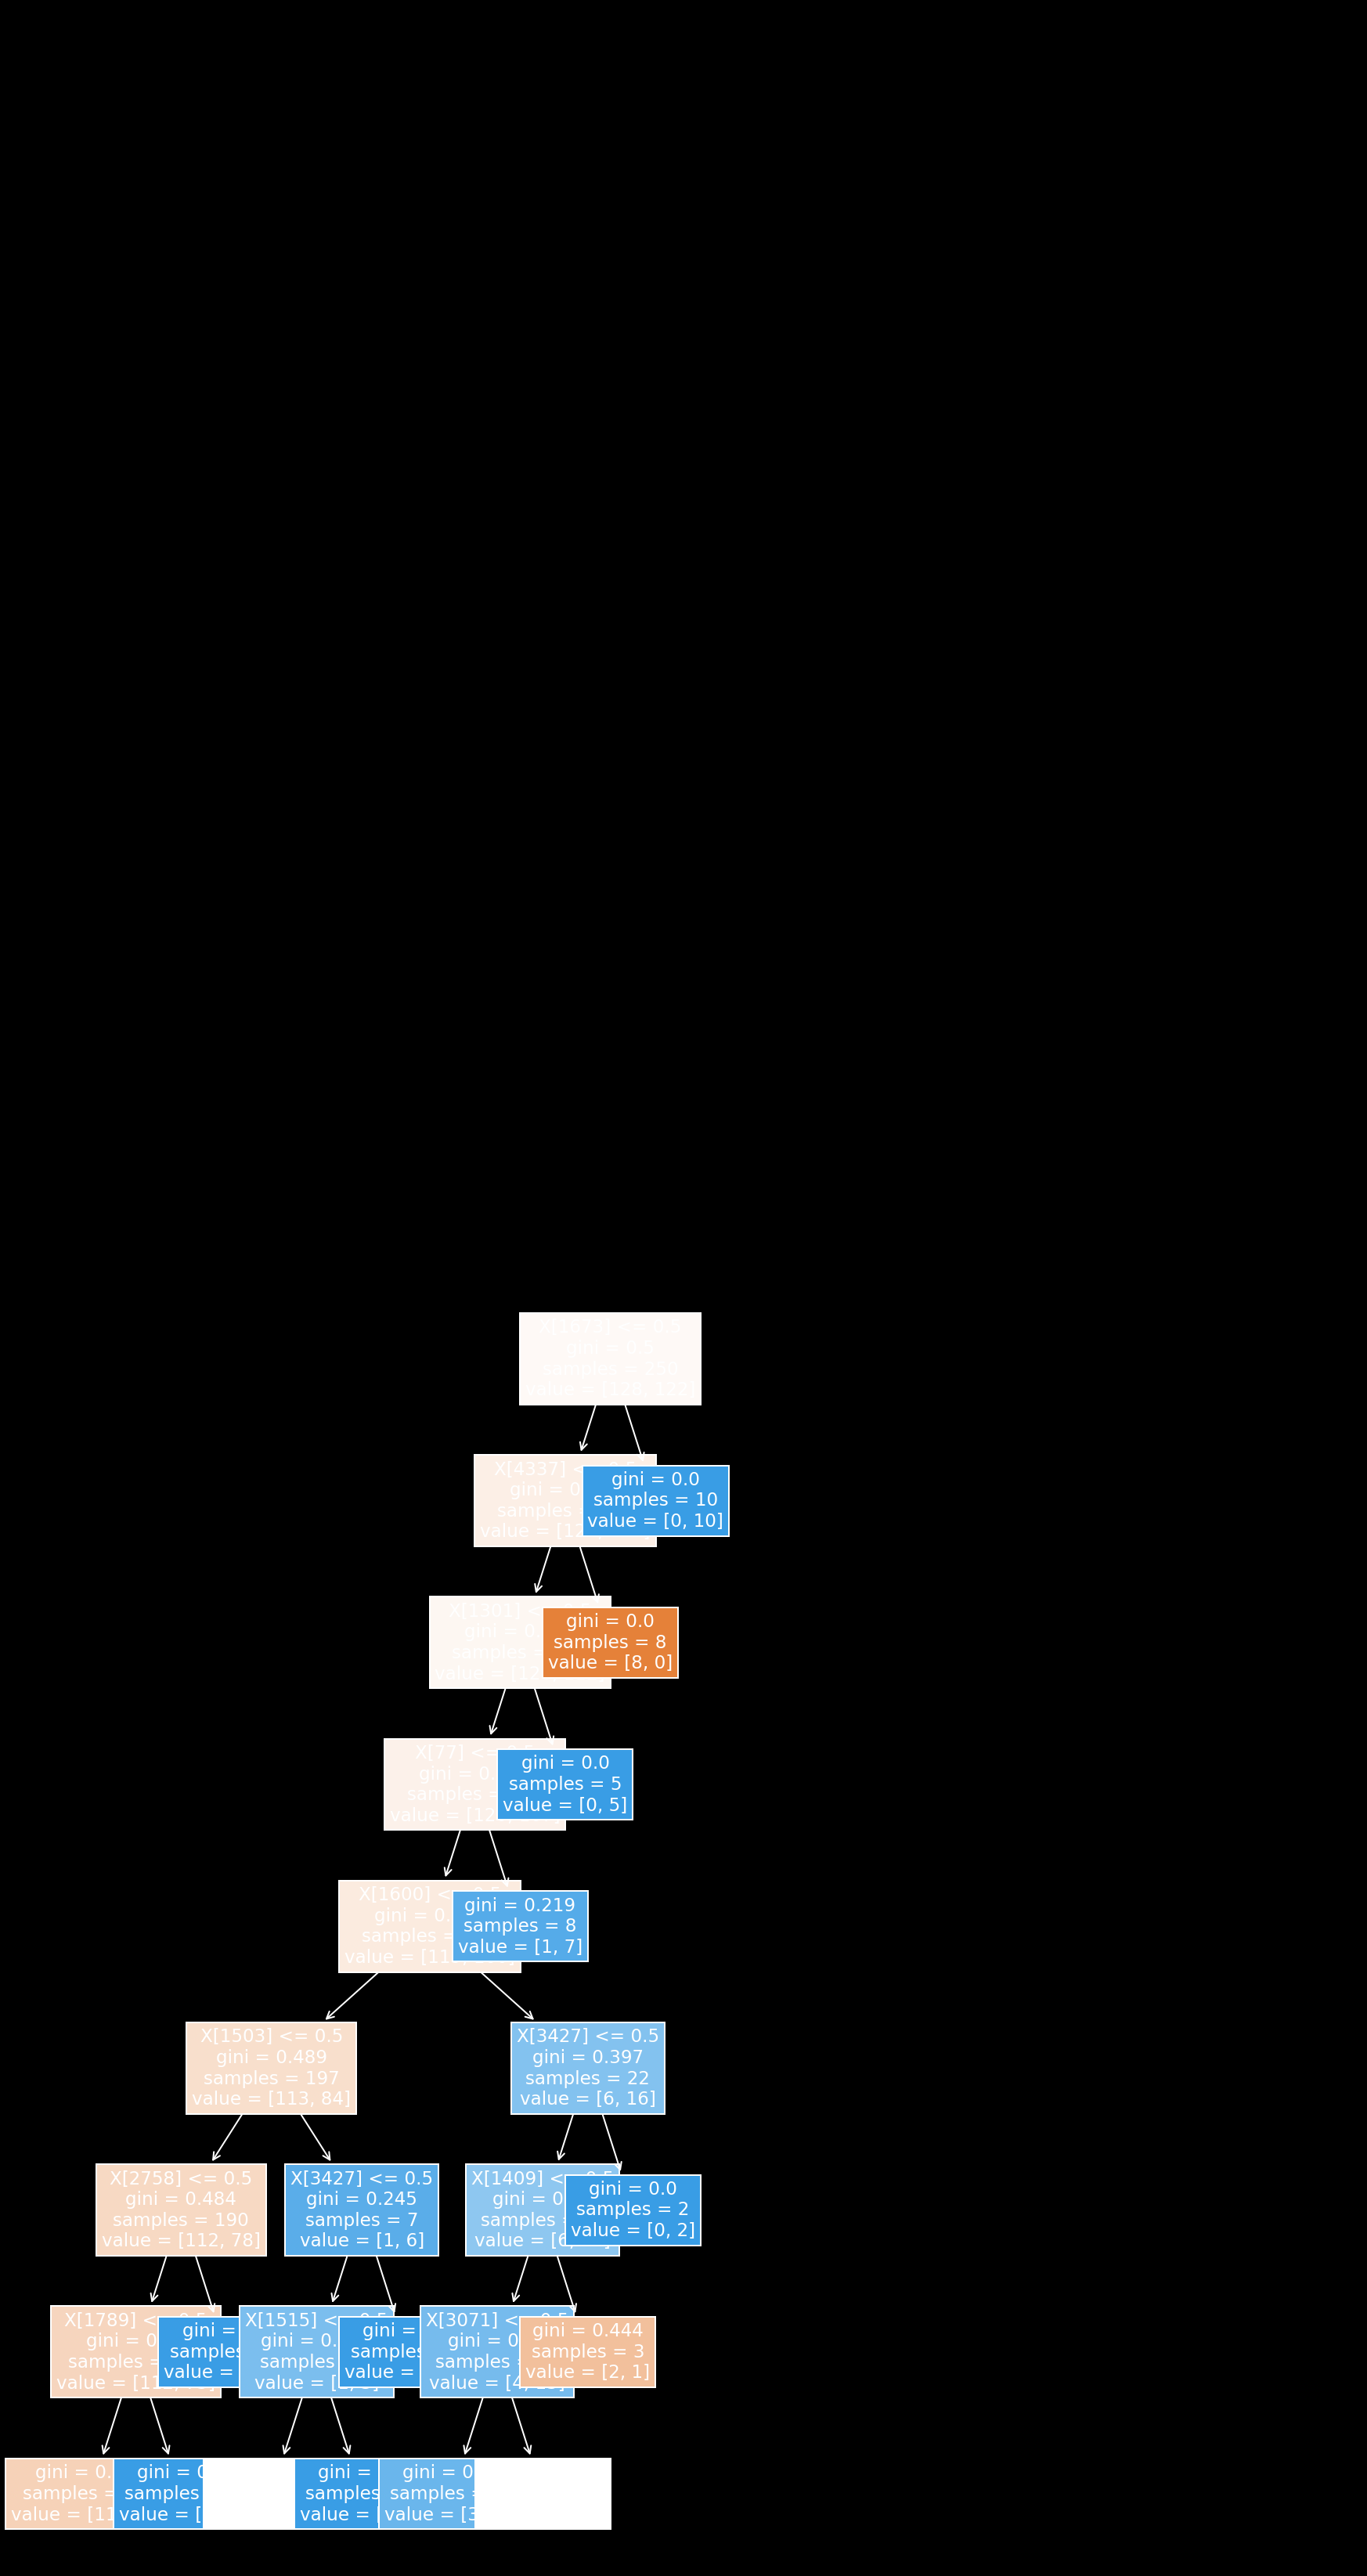

In [69]:
#Pintamos el árbol con scikitlearn
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.style.use('dark_background')


# Creamos el clasificador con los valores óptimos
tree_classifier8 = tree.DecisionTreeClassifier(random_state = 42, min_samples_leaf =2, max_depth = 8)
tree_classifier8.fit(test_vector_dataB2, test_target)

plt.figure(figsize=(15,30))
#fig, ax = plt.subplots(figsize=(60, 50), facecolor='k')
plot_tree(tree_classifier8, filled = True, rotate = True)
plt.show()

El árbol tiene una estructura marcada hacia la izquierda, para los primeros nodos el árbol avanza por los hijos de la izquierda ya que aparentemente clasifica la ausencia de las palabras que analiza en el nodo anterior como el sentimiento contrario: podemos observar que en el nodo que evalúa X[1301] el hijo derecho se clasifica como sentimiento negativo y es que feature_namesB2[1301] = 'fantastic'.

Por cada nivel el árbol busca las palabras que más discriminen, como podemos observar en los valores de gini en torno a 0.5, y es que la primera palabra, 'great' (feature_namesB2[1673]) aparece en un elvado número de textos y es bastante discriminatoria como hemos visto al analizar las variables más relevantes. Observamos que en los nodos (hojas en su mayor parte) derechos hay una menor cantidad de elementos y, como consecuencia éstos suelen ser mejor clasificados y más puros. Comparte relación con los resultados obtenidos previamente ya que vemos más impurezas a la hora de clasificar los textos negativos.

In [86]:
def verifica(clasif):
    np.array(clasif, dtype = 'i')
    indices = list()
 
    for i in range(1,len(clasif)):
        if (np.int(clasif[int(i)])!= test_target[int(i)]):
            indices.append(i)         
    #print(len(indices))
    return indices

Creamos una función para saber cuales son los elementos mal clasificados en cada una de las predicciones de los clasificadores.

In [89]:
listaA = verifica (tree_test_predictionsB2)
listaN = verifica (cnb_test_predictionsF2)

## Flasos positivos del árbol

In [119]:
print(test_data[listaA[4]])
print(tree_test_predictionsB2[listaA[4]])

The food wasn't good.	0
1


En este caso la crítica es claramente negativa pero se clasifica como positiva. Ha fallado por que tiene la palabra food y good es muy probable que la clasifique mal por que se salte wasn't que es a lo que le da el contexto negativo a la frase.

In [120]:
print(test_data[listaA[16]])
print(tree_test_predictionsB2[listaA[16]])

Now the burgers aren't as good, the pizza which used to be amazing is doughy and flavorless.	0
1


Esta frase la confunde con una frase positiva ya que contiene las palabras amazing y good, esto confunde al clasificador ya que solo contiene una palabra de conotación negativa explicita. No tiene en cuenta que está diciendo que antes eran geniales y que ahora la hamburguesa no es buena.

## Falsos negativos del árbol

In [121]:
print(test_data[listaA[5]])
print(tree_test_predictionsB2[listaA[5]])

I went to Bachi Burger on a friend's recommendation and was not disappointed.	1
0


Se ha confundido al clasificar la crítica por que la palabra disappointed toma mucho peso en la frase. Es una negación de algo negativo (lo que lo convierte en positivo) y eso es ambiguo.

In [122]:
print(test_data[listaA[28]])
print(tree_test_predictionsB2[listaA[28]])

And considering the two of us left there very full and happy for about $20, you just can't go wrong.	1
0


El clasificador confunde esta frase ya que tiene varias palabras con connotación negativa (sin contexto) wrong, full. Happy tiene poco peso en esta frase.

## Falsos positivos Naive Bayes

In [127]:
print(test_data[listaN[35]])
print(cnb_test_predictionsF2[listaN[35]])

This place deserves no stars.	0
1


La palabra deserves y stars lo confunde.

In [124]:
print(test_data[listaN[32]])
print(cnb_test_predictionsF2[listaN[32]])

The server was very negligent of our needs and made us feel very unwelcome... I would not suggest this place!	0
1


Palabras como very, suggest, feel... Hacen que el clasificador la confunda como una crítica positiva.

## Falsos negativos Naive Bayes

In [125]:
print(test_data[listaN[26]])
print(cnb_test_predictionsF2[listaN[26]])

No complaints!	1
0


La única palabra que tendría en cuenta aquí es complaints que, una vez más, sin el contexto evalúa como una palabra negativa.

In [126]:
print(test_data[listaN[20]])
print(cnb_test_predictionsF2[listaN[20]])

Omelets are to die for!	1
0


Se confunde porque no entiende que el significado de die es positivo en esta frase.

En la mayoría de los ejemplos de falsos negativos y falsos positivos el problema que tiene es que no tiene en cuenta el contexto y hay bastantes palabras que si le añades algo delante cambia claramente el significado.

------------------------------------------------------------------------------------------------------------------------

**Propuesta para mejorar**: No sería mala idea quitar el termino **no/not** de las stop words ya que este término puede como algún otro cambiar el significado de las palabras que van a continuación, conviertiendo así una crítica predecida como positiva en una negativa. Esto **tendría un mayor impacto**, a priori, **en las bolsas de bigramas** ya que, si bien no tienen en cuenta el contexto sí podrían aprender que aquellos términos con determinados adverbios delante infieren el sentimiento contrario.